In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

In [2]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## Creating data to view and fit

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

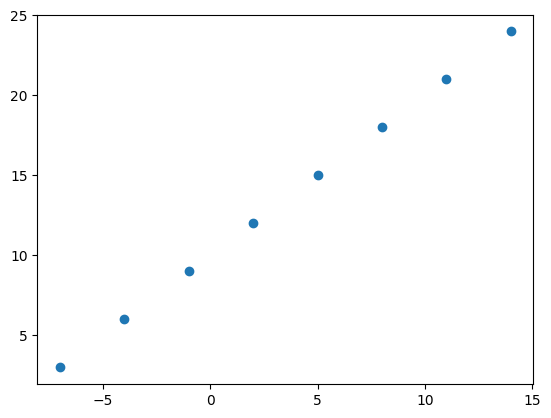

In [4]:
# Visualize
plt.scatter(X, Y)

In [5]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with tensorflow

1. Creating a model: Define input and output laters as well as the hidden layers
2. Compiling a model: Define loss function,  optimizer (how to improve the learning) and evaluation metrics.
3. Fitting a model: Find the patterns.

In [7]:
# Set random seed
tf.random.set_seed(42)

In [8]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,      # MAE: Mean absolote error
             optimizer=tf.keras.optimizers.SGD(), # SGD: Stochastic gradient descent
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 10.9836 - mae: 10.9836
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 10.8511 - mae: 10.8511
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 10.7186 - mae: 10.7186
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 10.5861 - mae: 10.5861
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 10.4536 - mae: 10.4536


In [9]:
# Check prediction
model.predict([17.0])

1/1 [==============================] - 0s 375ms/step


array([[15.247714]], dtype=float32)

## Improve the model

1. Create a model: Add more layers, increase the number of hidden units (neurons) within layers, change activation function of each layer.
2. Compile the model: Change optimization, change the learning rate of optimization function.
3. Fit the model: Change epochs (look at the data more times). Feed more data to train.

In [10]:
# Rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 872ms/step - loss: 7.8367 - mae: 7.8367
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7042 - mae: 7.7042
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5717 - mae: 7.5717
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4438 - mae: 7.4438
Epoch 11/100
1/1 [==============================] - 0s 0s/step - los

1/1 [==============================] - 0s 16ms/step - loss: 7.0050 - mae: 7.0050
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 6.9994 - mae: 6.9994
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9938 - mae: 6.9938
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9881 - mae: 6.9881
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9825 - mae: 6.9825
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9769 - mae: 6.9769
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9713 - mae: 6.9713
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9656 - mae: 6.9656
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9600 - mae: 6.9600
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9544 - mae: 6.9544
Epoch 98/100
1/1 [==============================] - 0s 0s/step - loss: 6.94

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 172ms/step


array([[30.049765]], dtype=float32)

In [12]:
# Trying another change: Extra layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 15.2516 - mae: 15.2516
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.4420 - mae: 14.4420
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7404 - mae: 13.7404
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.0448 - mae: 13.0448
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.3508 - mae: 12.3508
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6557 - mae: 11.6557
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 10.9574 - mae: 10.9574
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2534 - mae: 10.2534
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.5415 - mae: 9.5415
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.8196 - mae: 8.8196
Epoch 11/100
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 16ms/step - loss: 0.2480 - mae: 0.2480
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2472 - mae: 0.2472
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3099 - mae: 0.3099
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3584 - mae: 0.3584
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2455 - mae: 0.2455
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.3973 - mae: 0.3973
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3806 - mae: 0.3806
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1139 - mae: 0.1139
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4020 - mae: 0.4020
Epoch 97/100
1/1 [==============================] - 0s 0s/step - loss: 0.5581 - mae: 0.5581
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 0.41

In [13]:
# Might be overfitting, since the metrics is better, but the predicion deviates more than the previous test 
model.predict([17.0])

1/1 [==============================] - 0s 203ms/step


array([[26.565884]], dtype=float32)

## Evaluating a model

"Visualize, visualize, visualize"

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [15]:
# Make labels
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

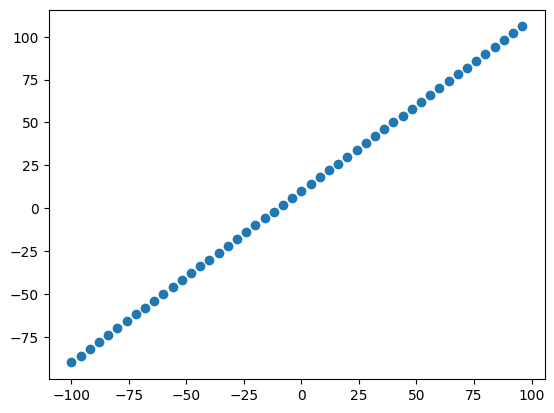

In [16]:
# Visualize the data
plt.scatter(X, Y)

In [17]:
# Split the data in train/test
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visualizing the data

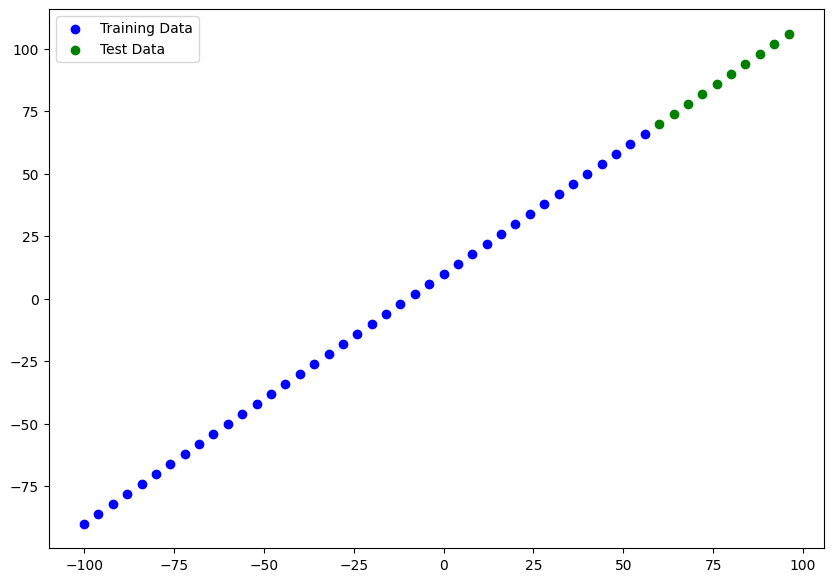

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, c='b', label='Training Data')
plt.scatter(X_test, Y_test, c='g', label='Test Data')
plt.legend()
plt.show()

In [19]:
# Neural network for our data
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
    tf.keras.layers.Dense(1, name='Output_Layer'),
], name='model_1')
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 0s/step - loss: 56.0428 - mae: 56.0428
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 48.3255 - mae: 48.3255
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 40.9545 - mae: 40.9545
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 33.3943 - mae: 33.3943
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 26.0896 - mae: 26.0896
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 18.8701 - mae: 18.8701
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 12.1259 - mae: 12.1259
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 8.4075 - mae: 8.4075
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 10.2739 - mae: 10.2739
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 11.7010 - mae: 11.7010
Epoch 11/100
2/2 [==============================] - 0

2/2 [==============================] - 0s 31ms/step - loss: 1.2217 - mae: 1.2217
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 2.1566 - mae: 2.1566
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.9435 - mae: 0.9435
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 1.2464 - mae: 1.2464
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 0.4766 - mae: 0.4766
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 1.5326 - mae: 1.5326
Epoch 94/100
2/2 [==============================] - 0s 0s/step - loss: 0.6517 - mae: 0.6517
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0907 - mae: 1.0907
Epoch 96/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1463 - mae: 0.1463
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1108 - mae: 0.1108
Epoch 98/100
2/2 [==============================] - 0s 16ms/step - loss: 0.

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**- Dense layer: Fully connected layers, ie all neurons from each layer connect to all neurons on the next.**  
**- Non-trainable params: When getting a pre-trained model sometimes we may want to "freeze" some parameters.**

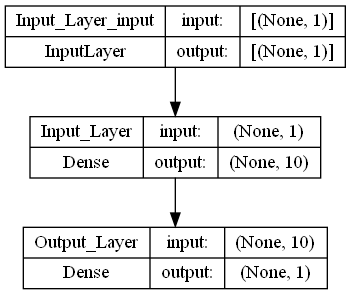

In [21]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Visualizing predictions

In [22]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 125ms/step


array([[ 70.68696],
       [ 74.72524],
       [ 78.76353],
       [ 82.80183],
       [ 86.84011],
       [ 90.8784 ],
       [ 94.91669],
       [ 98.95498],
       [102.99327],
       [107.03156]], dtype=float32)

In [23]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [24]:
# Plotting function
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred):
    """
    Plots training data, test data and compare predictions to ground truth labels
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    
    # Plot model's predictions
    plt.scatter(test_data, predictions, c='r', label='Prediction')
    # Show legend
    plt.legend()
    plt.show()

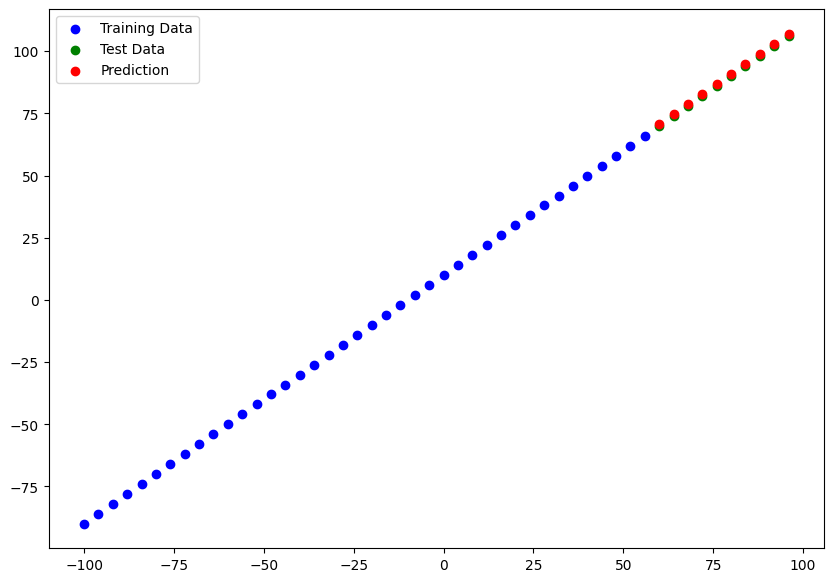

In [25]:
plot_predictions()

## Evaluating the model

In [26]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 375ms/step - loss: 0.8593 - mae: 0.8593


[0.8592551946640015, 0.8592551946640015]

In [27]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.85925674>

In [28]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.75041735>

In [29]:
# Make some functions for mse and mae
def mae(Y_true, Y_pred):
    return tf.metrics.mean_absolute_error(y_true=Y_true, y_pred=tf.squeeze(Y_pred))

def mse(Y_true, Y_pred):
    return tf.metrics.mean_squared_error(y_true=Y_true, y_pred=tf.squeeze(Y_pred))

## Experiments to improve the model

In [30]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

**Modeling experiments:**
- Same original model, 1 layer, 100 epochs
- 2 layers, 100 epochs
- 2 layers, 500 epochs

In [31]:
# Setting the seed
tf.random.set_seed(42)

In [32]:
# Model 1
# Definition
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile
model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# Fit
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 31ms/step - loss: 106.9504 - mae: 106.9504
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 71.4950 - mae: 71.4950
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 33.9737 - mae: 33.9737
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 7.5845 - mae: 7.5845
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 7.5984 - mae: 7.5984
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.0536 - mae: 9.0536
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 9.4665 - mae: 9.4665
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.3279 - mae: 9.3279
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 7.5530 - mae: 7.5530
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 12.5809 - mae: 12.5809
Epoch 11/100
2/2 [==============================] - 0s 0s/step 

2/2 [==============================] - 0s 16ms/step - loss: 11.4503 - mae: 11.4503
Epoch 88/100
2/2 [==============================] - 0s 0s/step - loss: 9.9526 - mae: 9.9526
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 7.2802 - mae: 7.2802
Epoch 90/100
2/2 [==============================] - 0s 0s/step - loss: 12.7094 - mae: 12.7094
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 7.3369 - mae: 7.3369
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 7.7006 - mae: 7.7006
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 7.1476 - mae: 7.1476
Epoch 94/100
2/2 [==============================] - 0s 0s/step - loss: 12.5587 - mae: 12.5587
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 9.9382 - mae: 9.9382
Epoch 96/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1726 - mae: 9.1726
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - loss: 12

1/1 [==============================] - 0s 125ms/step


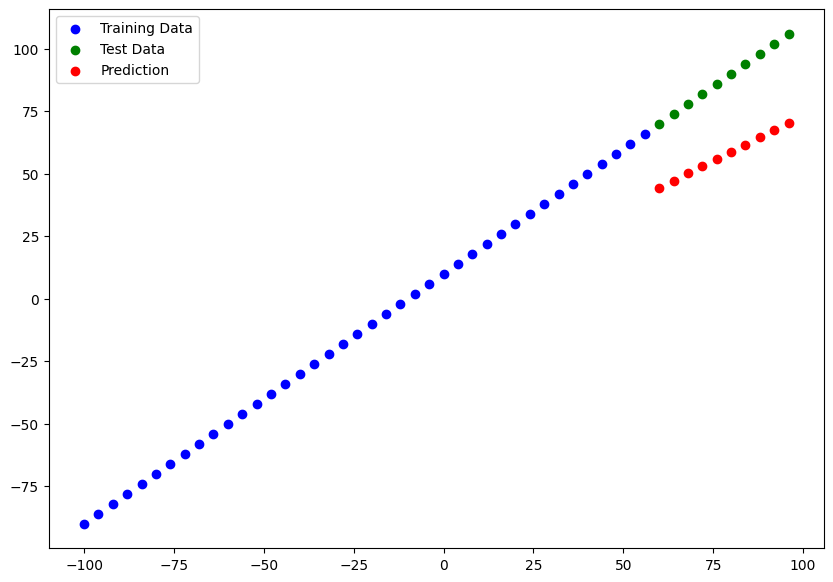

In [33]:
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [34]:
# Calculate model 1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.644573>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.5>)

In [35]:
tf.random.set_seed(42)

In [36]:
# Model 2 (just to experiment, the metrics on compile will be mse instead of mae)
# Definition
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile
model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])
# Fit
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 30.4171 - mse: 1325.9797
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 26.2718 - mse: 888.3324
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 30.9053 - mse: 1449.0945
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 30.1459 - mse: 1354.3876
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 15.3760 - mse: 303.3124
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 12.2024 - mse: 184.9776
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 11.4885 - mse: 160.4634
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 11.2002 - mse: 175.5429
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 41.7540 - mse: 2778.8247
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 28.9821 - mse: 1187.2981
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 16ms/step - loss: 15.3483 - mse: 317.0156
Epoch 87/100
2/2 [==============================] - 0s 0s/step - loss: 19.2298 - mse: 526.7781
Epoch 88/100
2/2 [==============================] - 0s 16ms/step - loss: 29.5083 - mse: 1258.2830
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 10.1377 - mse: 124.2368
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 21.2626 - mse: 647.4828
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 10.5175 - mse: 163.0436
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 18.1610 - mse: 451.6021
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 6.5473 - mse: 60.6466
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 11.1753 - mse: 155.6878
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 24.6027 - mse: 909.1815
Epoch 96/100
2/2 [============================

1/1 [==============================] - 0s 141ms/step


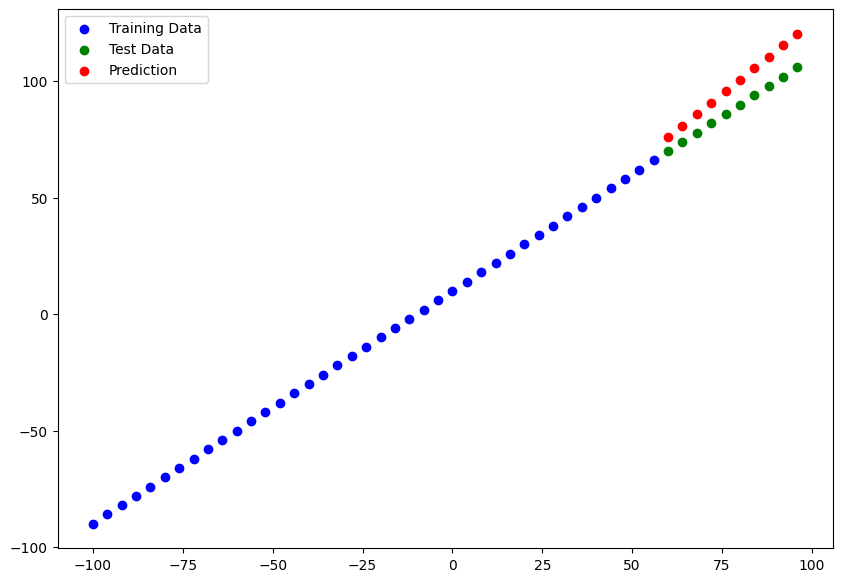

In [37]:
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [38]:
# Calculate model 1 evaluation metrics
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.143616>,
 <tf.Tensor: shape=(), dtype=float32, numpy=110.23983>)

In [39]:
tf.random.set_seed(42)

In [40]:
# Model 3 (just to experiment, the metrics on compile will be mse instead of mae)
# Definition
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile
model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# Fit
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 31ms/step - loss: 36.5252 - mae: 36.5252
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 29.0619 - mae: 29.0619
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 34.8682 - mae: 34.8682
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 24.1626 - mae: 24.1626
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 14.3739 - mae: 14.3739
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 11.4857 - mae: 11.4857
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 12.5310 - mae: 12.5310
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 11.0040 - mae: 11.0040
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 39.2714 - mae: 39.2714
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 26.8188 - mae: 26.8188
Epoch 11/500
2/2 [==============================] - 0s 16ms

2/2 [==============================] - 0s 0s/step - loss: 11.4702 - mae: 11.4702
Epoch 88/500
2/2 [==============================] - 0s 16ms/step - loss: 27.0505 - mae: 27.0505
Epoch 89/500
2/2 [==============================] - 0s 0s/step - loss: 9.7418 - mae: 9.7418
Epoch 90/500
2/2 [==============================] - 0s 16ms/step - loss: 19.0894 - mae: 19.0894
Epoch 91/500
2/2 [==============================] - 0s 0s/step - loss: 10.6003 - mae: 10.6003
Epoch 92/500
2/2 [==============================] - 0s 16ms/step - loss: 18.3035 - mae: 18.3035
Epoch 93/500
2/2 [==============================] - 0s 0s/step - loss: 6.8610 - mae: 6.8610
Epoch 94/500
2/2 [==============================] - 0s 16ms/step - loss: 13.0727 - mae: 13.0727
Epoch 95/500
2/2 [==============================] - 0s 0s/step - loss: 18.4511 - mae: 18.4511
Epoch 96/500
2/2 [==============================] - 0s 16ms/step - loss: 10.4084 - mae: 10.4084
Epoch 97/500
2/2 [==============================] - 0s 0s/step - lo

2/2 [==============================] - 0s 16ms/step - loss: 28.4878 - mae: 28.4878
Epoch 173/500
2/2 [==============================] - 0s 0s/step - loss: 16.1187 - mae: 16.1187
Epoch 174/500
2/2 [==============================] - 0s 16ms/step - loss: 10.5088 - mae: 10.5088
Epoch 175/500
2/2 [==============================] - 0s 0s/step - loss: 27.4986 - mae: 27.4986
Epoch 176/500
2/2 [==============================] - 0s 16ms/step - loss: 8.4350 - mae: 8.4350
Epoch 177/500
2/2 [==============================] - 0s 0s/step - loss: 9.4040 - mae: 9.4040
Epoch 178/500
2/2 [==============================] - 0s 16ms/step - loss: 18.4028 - mae: 18.4028
Epoch 179/500
2/2 [==============================] - 0s 0s/step - loss: 10.5055 - mae: 10.5055
Epoch 180/500
2/2 [==============================] - 0s 16ms/step - loss: 8.0105 - mae: 8.0105
Epoch 181/500
2/2 [==============================] - 0s 0s/step - loss: 17.5834 - mae: 17.5834
Epoch 182/500
2/2 [==============================] - 0s 16ms

2/2 [==============================] - 0s 16ms/step - loss: 10.6040 - mae: 10.6040
Epoch 258/500
2/2 [==============================] - 0s 0s/step - loss: 14.1969 - mae: 14.1969
Epoch 259/500
2/2 [==============================] - 0s 16ms/step - loss: 11.2735 - mae: 11.2735
Epoch 260/500
2/2 [==============================] - 0s 0s/step - loss: 31.5527 - mae: 31.5527
Epoch 261/500
2/2 [==============================] - 0s 16ms/step - loss: 11.1966 - mae: 11.1966
Epoch 262/500
2/2 [==============================] - 0s 0s/step - loss: 10.0505 - mae: 10.0505
Epoch 263/500
2/2 [==============================] - 0s 16ms/step - loss: 8.9665 - mae: 8.9665
Epoch 264/500
2/2 [==============================] - 0s 0s/step - loss: 21.4359 - mae: 21.4359
Epoch 265/500
2/2 [==============================] - 0s 16ms/step - loss: 11.4808 - mae: 11.4808
Epoch 266/500
2/2 [==============================] - 0s 0s/step - loss: 13.3252 - mae: 13.3252
Epoch 267/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 16ms/step - loss: 14.1448 - mae: 14.1448
Epoch 343/500
2/2 [==============================] - 0s 16ms/step - loss: 11.7061 - mae: 11.7061
Epoch 344/500
2/2 [==============================] - 0s 0s/step - loss: 10.7251 - mae: 10.7251
Epoch 345/500
2/2 [==============================] - 0s 16ms/step - loss: 30.9127 - mae: 30.9127
Epoch 346/500
2/2 [==============================] - 0s 0s/step - loss: 10.6606 - mae: 10.6606
Epoch 347/500
2/2 [==============================] - 0s 16ms/step - loss: 25.5853 - mae: 25.5853
Epoch 348/500
2/2 [==============================] - 0s 16ms/step - loss: 13.2493 - mae: 13.2493
Epoch 349/500
2/2 [==============================] - 0s 0s/step - loss: 13.0701 - mae: 13.0701
Epoch 350/500
2/2 [==============================] - 0s 16ms/step - loss: 15.4224 - mae: 15.4224
Epoch 351/500
2/2 [==============================] - 0s 0s/step - loss: 32.8877 - mae: 32.8877
Epoch 352/500
2/2 [==============================] -

2/2 [==============================] - 0s 0s/step - loss: 6.4164 - mae: 6.4164
Epoch 428/500
2/2 [==============================] - 0s 16ms/step - loss: 13.1556 - mae: 13.1556
Epoch 429/500
2/2 [==============================] - 0s 0s/step - loss: 10.9250 - mae: 10.9250
Epoch 430/500
2/2 [==============================] - 0s 16ms/step - loss: 11.7917 - mae: 11.7917
Epoch 431/500
2/2 [==============================] - 0s 16ms/step - loss: 7.9684 - mae: 7.9684
Epoch 432/500
2/2 [==============================] - 0s 0s/step - loss: 22.1413 - mae: 22.1413
Epoch 433/500
2/2 [==============================] - 0s 16ms/step - loss: 5.9277 - mae: 5.9277
Epoch 434/500
2/2 [==============================] - 0s 0s/step - loss: 31.9201 - mae: 31.9201
Epoch 435/500
2/2 [==============================] - 0s 16ms/step - loss: 11.1642 - mae: 11.1642
Epoch 436/500
2/2 [==============================] - 0s 0s/step - loss: 14.4224 - mae: 14.4224
Epoch 437/500
2/2 [==============================] - 0s 16ms

1/1 [==============================] - 0s 125ms/step


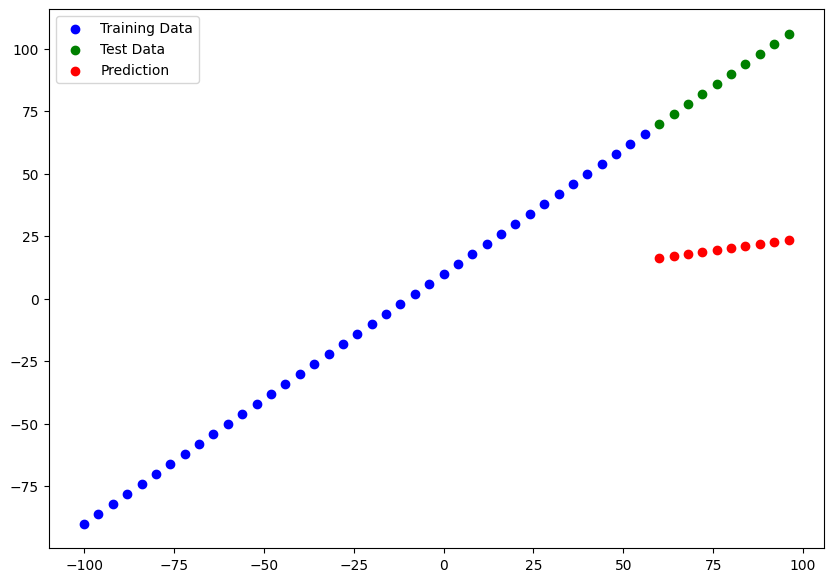

In [41]:
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [42]:
# Calculate model 3 evaluation metrics
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.02751>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4712.3486>)

In [43]:
# Calculate model 3 training evaluation metrics
Y_preds_3_train = model_3.predict(X_train)

2/2 [==============================] - 0s 0s/step


In [44]:
mae_3_train = mae(Y_train, Y_preds_3_train)
mse_3_train = mse(Y_train, Y_preds_3_train)
mae_3_train, mse_3_train

(<tf.Tensor: shape=(), dtype=float32, numpy=33.149193>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1511.2737>)

## Comparing the results

In [45]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])

In [46]:
all_results

,model,mae,mse
0,model_1,30.644573,949.500000
1,model_2,10.143616,110.239830
2,model_3,68.027512,4712.348633


**Model 2 performed better**

In [47]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking experiments
Tools to help:
- TensorBoard:  Library to help track experiments.
- Weights & Biases: Tool for tracking all kinds of ML experiments. (Plugs into TensorBoard)

## Saving our models

Two formats:
- The SavedModel format.
- The HDF5 format.

In [48]:
# Saving using SavedModel
model_2.save('best_model_SavedModel_format')

In [49]:
# Saving HDF5 (better for other cases outside the notebook)
model_2.save('best_model_HDF5_format.h5')

## Load saved models

In [50]:
# SavedModel
load_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
load_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compare model_2 predictions with loaded model
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = load_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 141ms/step


In [53]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [54]:
# Loading the HDF5 format
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')

In [55]:
loaded_h5_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [56]:
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

1/1 [==============================] - 0s 125ms/step


In [57]:
loaded_h5_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [58]:
# Read the insurance dataset
insurance = pd.read_csv('datasets/insurance.csv')

In [59]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
insurance.shape

(1338, 7)

**Function get_dummies in pandas for one hot encoding** 

In [63]:
insurance_one_hot = pd.get_dummies(insurance)

In [65]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [69]:
X = insurance_one_hot.drop(columns=['charges'], axis=1)
Y = insurance_one_hot['charges']

In [74]:
# Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.shape, X_train.shape, X_test.shape

((1338, 11), (1070, 11), (268, 11))

In [77]:
# Build a model similar to model_2
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [79]:
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8749.7266 - mae: 8749.7266
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7860.2310 - mae: 7860.2310
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7612.0752 - mae: 7612.0752
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7737.4253 - mae: 7737.4253
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7711.2783 - mae: 7711.2783
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7606.8198 - mae: 7606.8198
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7530.7451 - mae: 7530.7451
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7695.6133 - mae: 7695.6133
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7609.8867 - mae: 7609.8867
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7713.0527 - mae: 7713.0527

34/34 [==============================] - 0s 3ms/step - loss: 7358.0864 - mae: 7358.0864
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 7438.8589 - mae: 7438.8589
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 7374.0830 - mae: 7374.0830
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7272.8999 - mae: 7272.8999
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 7235.4351 - mae: 7235.4351
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 7143.2427 - mae: 7143.2427
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 7394.9165 - mae: 7394.9165
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7209.8750 - mae: 7209.8750
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 7335.2764 - mae: 7335.2764
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 7154.5234 - mae: 7154.5234
Epo

In [80]:
# Check the results on test data
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7363.9170 - mae: 7363.9170


[7363.9169921875, 7363.9169921875]

In [81]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

**The model isn't performing well, a mae of ~7000 is very significant when looking at the mean and median of the target variable.**

## Improving the model

We will try 2 experiments. 
- Add an extra layer and Adam optimizer
- Train for longer

In [86]:
# First experiment
tf.random.set_seed(42)

# Create the model
insurance_model_test_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_test_1.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

# Fit the model
insurance_model_test_1.fit(X_train, Y_train, epochs=100, verbose=0)

In [87]:
# Check the results on test data
insurance_model_test_1.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 5060.7129 - mae: 5060.7129


[5060.712890625, 5060.712890625]

In [92]:
# Second experiment
tf.random.set_seed(42)

# Create the model
insurance_model_test_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_test_2.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

# Fit the model and save history
history_model_test_2 = insurance_model_test_2.fit(X_train, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13307.7188 - mae: 13307.7188
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13156.1543 - mae: 13156.1543
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12834.2646 - mae: 12834.2646
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12184.5195 - mae: 12184.5195
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 11069.2275 - mae: 11069.2275
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9602.2803 - mae: 9602.2803
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8232.4824 - mae: 8232.4824
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7542.1089 - mae: 7542.1089
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7424.6074 - mae: 7424.6074
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7403.7642 - mae:

34/34 [==============================] - 0s 4ms/step - loss: 5784.3579 - mae: 5784.3579
Epoch 83/200
34/34 [==============================] - 0s 4ms/step - loss: 5755.5273 - mae: 5755.5273
Epoch 84/200
34/34 [==============================] - 0s 4ms/step - loss: 5719.9790 - mae: 5719.9790
Epoch 85/200
34/34 [==============================] - 0s 4ms/step - loss: 5692.8145 - mae: 5692.8145
Epoch 86/200
34/34 [==============================] - 0s 4ms/step - loss: 5656.0718 - mae: 5656.0718
Epoch 87/200
34/34 [==============================] - 0s 4ms/step - loss: 5618.2192 - mae: 5618.2192
Epoch 88/200
34/34 [==============================] - 0s 4ms/step - loss: 5580.3979 - mae: 5580.3979
Epoch 89/200
34/34 [==============================] - 0s 3ms/step - loss: 5539.6484 - mae: 5539.6484
Epoch 90/200
34/34 [==============================] - 0s 4ms/step - loss: 5495.6602 - mae: 5495.6602
Epoch 91/200
34/34 [==============================] - 0s 4ms/step - loss: 5455.5884 - mae: 5455.5884
Epo

34/34 [==============================] - 0s 4ms/step - loss: 3725.2017 - mae: 3725.2017
Epoch 163/200
34/34 [==============================] - 0s 4ms/step - loss: 3722.3396 - mae: 3722.3396
Epoch 164/200
34/34 [==============================] - 0s 4ms/step - loss: 3726.1472 - mae: 3726.1472
Epoch 165/200
34/34 [==============================] - 0s 4ms/step - loss: 3715.3342 - mae: 3715.3342
Epoch 166/200
34/34 [==============================] - 0s 4ms/step - loss: 3720.0930 - mae: 3720.0930
Epoch 167/200
34/34 [==============================] - 0s 4ms/step - loss: 3720.0593 - mae: 3720.0596
Epoch 168/200
34/34 [==============================] - 0s 3ms/step - loss: 3714.9797 - mae: 3714.9797
Epoch 169/200
34/34 [==============================] - 0s 4ms/step - loss: 3713.7202 - mae: 3713.7202
Epoch 170/200
34/34 [==============================] - 0s 4ms/step - loss: 3707.5083 - mae: 3707.5083
Epoch 171/200
34/34 [==============================] - 0s 3ms/step - loss: 3707.3694 - mae: 3707

In [93]:
# Check the results on test data
insurance_model_test_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3491.0806 - mae: 3491.0806


[3491.08056640625, 3491.08056640625]

Text(0.5, 0, 'epochs')

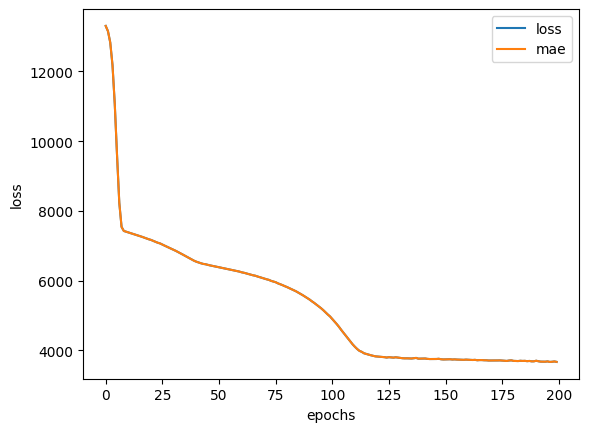

In [94]:
# Plot history, also known as loss curve or training curve
pd.DataFrame(history_model_test_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


    🤔 Question: How long should you train for?

    It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.
